# Convergence diagnostics

`pypsv` uses an MCMC sampler (`numpyro` `NUTS` via `pyMC`). To make sure the results are meaningful, some proxies exist to test whether the sampled ensemble converged to the posterior distribution. `pypsv` comes with a convenience routine to generate a summary table and print some diagnostics. We first load the output from the previous example:

In [1]:
import arviz as az

iData = az.from_netcdf('./example_out_akm.nc')

and then run the summary calculation and diagnostics routine:

In [2]:
from pypsv.convergence_report import calc_summary_and_print_diagnostics

summary = calc_summary_and_print_diagnostics(iData)

The maximal treedepth was 7.
The chains had 0 divergences.
There were 0 random variables with rhat > 1.10.
Effective sample size ratio estimations:
            min / mean / max
from bulk: 0.87 / 1.76 / 2.63
from tail: 0.52 / 0.70 / 0.89



The output indicates that there were no divergences and the chains have mixed well. The tail estimated effective sample sizes suggest a slight auto-correlation in the chains. We can deal with this by thinning the ensemble, as shown in the next example. Additionally, we can look at the marginal energy and the log-posterior:

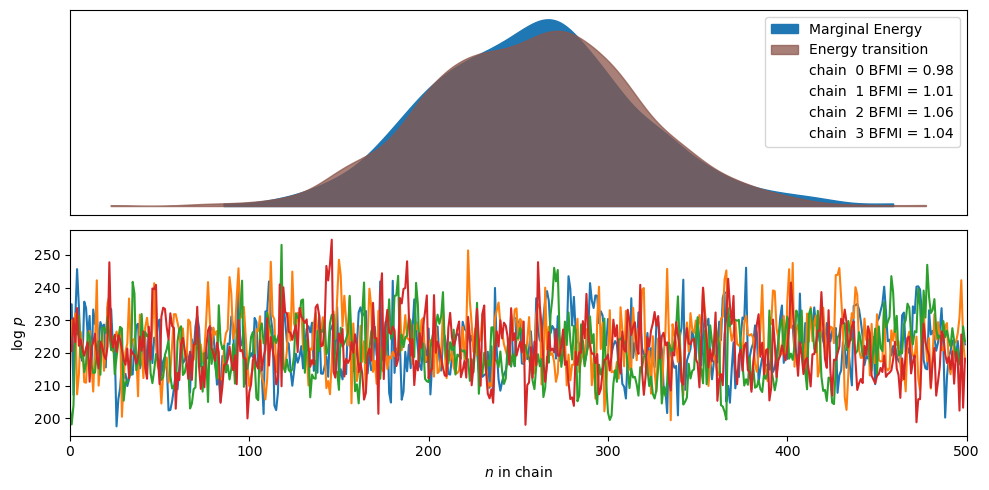

In [3]:
import numpy as np
from matplotlib import pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(10, 5))

az.plot_energy(iData, ax=axs[0])

lp = np.array(iData.sample_stats['lp'])
n_chains = lp.shape[0]

for it in range(4):
    axs[1].plot(
        np.arange(lp.shape[1]),
        lp[it],
    )

axs[1].set_ylabel('log $p$')
axs[1].set_xlabel('$n$ in chain')
axs[1].set_xlim(0, lp.shape[1])

fig.tight_layout(w_pad=1.3)

The marginal energy and energy transition distributions (top plot) overlap well, indicating good exploration properties of the sampler. Further, the log-posterior values for the individual chains show no obvious signs of auto-correlation, again indicating good sampling behaviour.

Additional information on convergence diagnostics for MCMC can be found in the [stan docs](https://mc-stan.org/docs/reference-manual/analysis.html) or in *Bayesian Data Analysis* by Gelman et al. (Chapman and Hall, 3rd ed, 2013).